# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [84]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) # 1500 points with latitude beween -90 and 90 and longitu...
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# lats = [1,2,3,4]
# lngs = [7,6,5,3]
# lats_lngs = [(1,7), (2,6), (3,5), (4,3)]

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 567


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [85]:
''''''
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
''''''

''

In [86]:
"""
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")
"""

'\n# List of cities\ncities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]\n\n# set up lists to hold reponse info\nlat = []\ntemp = []\n\n# Loop through the list of cities and perform a request for data on each\nfor city in cities:\n    response = requests.get(query_url + city).json()\n    lat.append(response[\'coord\'][\'lat\'])\n    temp.append(response[\'main\'][\'temp\'])\n\nprint(f"The latitude information received is: {lat}")\nprint(f"The temperature information received is: {temp}")\n'

In [87]:
"""
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data
"""

'\n# create a data frame from cities, lat, and temp\nweather_dict = {\n    "city": cities,\n    "lat": lat,\n    "temp": temp\n}\nweather_data = pd.DataFrame(weather_dict)\nweather_data\n'

In [88]:
from datetime import datetime
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


"""
cities = [Sydney, Lisbon, Madrid, New York, Chicago, London, Brussels, Edinburgh, Hampton]
Set  Record   City
1      1     Sydney
1      2     Lisbon
1      3     Madrid
..
1     49     New York
2      0     Chicago
2      1       London
2      49      
...
2      49     
3      1
"""

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        print(city_weather)
        # break
        
        # {'coord': {'lon': -130.1015, 'lat': -25.066}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.92, 'feels_like': 22.1, 'temp_min': 21.92, 'temp_max': 21.92, 'pressure': 1016, 'humidity': 74, 'sea_level': 1016, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3.27, 'deg': 312, 'gust': 3.45}, 'clouds': {'all': 78}, 'dt': 1715297338, 'sys': {'country': 'PN', 'sunrise': 1715267221, 'sunset': 1715306800}, 'timezone': -28800, 'id': 4030723, 'name': 'Adamstown', 'cod': 200}
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] 
        city_lng = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
{'coord': {'lon': 5.6325, 'lat': -1.4014}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.62, 'feels_like': 26.62, 'temp_min': 26.62, 'temp_max': 26.62, 'pressure': 1009, 'humidity': 90, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.77, 'deg': 181, 'gust': 7.45}, 'clouds': {'all': 93}, 'dt': 1715299570, 'sys': {'country': 'GQ', 'sunrise': 1715319132, 'sunset': 1715362535}, 'timezone': 3600, 'id': 2306774, 'name': 'San Antonio de Palé', 'cod': 200}
Processing Record 2 of Set 1 | kirando
{'coord': {'lon': 30.6, 'lat': -7.4167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.29, 'feels_like': 22.56, 'temp_min': 22.29, 'temp_max': 22.29, 'pressure': 1011, 'humidity': 76, 'sea_lev

In [89]:
{
   "coord":{
      "lon":-130.1015,
      "lat":-25.066
   },
   "weather":[
      {
         "id":803,
         "main":"Clouds",
         "description":"broken clouds",
         "icon":"04d"
      }
   ],
   "base":"stations",
   "main":{
      "temp":21.92,
      "feels_like":22.1,
      "temp_min":21.92,
      "temp_max":21.92,
      "pressure":1016,
      "humidity":74,
      "sea_level":1016,
      "grnd_level":1006
   },
   "visibility":10000,
   "wind":{
      "speed":3.27,
      "deg":312,
      "gust":3.45
   },
   "clouds":{
      "all":78
   },
   "dt":1715297338,
   "sys":{
      "country":"PN",
      "sunrise":1715267221,
      "sunset":1715306800
   },
   "timezone":-28800,
   "id":4030723,
   "name":"Adamstown",
   "cod":200
}

{'coord': {'lon': -130.1015, 'lat': -25.066},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 21.92,
  'feels_like': 22.1,
  'temp_min': 21.92,
  'temp_max': 21.92,
  'pressure': 1016,
  'humidity': 74,
  'sea_level': 1016,
  'grnd_level': 1006},
 'visibility': 10000,
 'wind': {'speed': 3.27, 'deg': 312, 'gust': 3.45},
 'clouds': {'all': 78},
 'dt': 1715297338,
 'sys': {'country': 'PN', 'sunrise': 1715267221, 'sunset': 1715306800},
 'timezone': -28800,
 'id': 4030723,
 'name': 'Adamstown',
 'cod': 200}

In [97]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [91]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,26.62,90,93,5.77,GQ,1715299570
1,kirando,-7.4167,30.6000,22.29,76,72,2.42,TZ,1715299570
2,port-aux-francais,-49.3500,70.2167,6.48,90,95,16.42,TF,1715299326
3,blackmans bay,-43.0167,147.3167,13.07,96,99,1.39,AU,1715299324
4,edinburgh of the seven seas,-37.0676,-12.3116,12.33,57,89,3.12,SH,1715299571


In [92]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [93]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,26.62,90,93,5.77,GQ,1715299570
1,kirando,-7.4167,30.6000,22.29,76,72,2.42,TZ,1715299570
2,port-aux-francais,-49.3500,70.2167,6.48,90,95,16.42,TF,1715299326
3,blackmans bay,-43.0167,147.3167,13.07,96,99,1.39,AU,1715299324
4,edinburgh of the seven seas,-37.0676,-12.3116,12.33,57,89,3.12,SH,1715299571


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

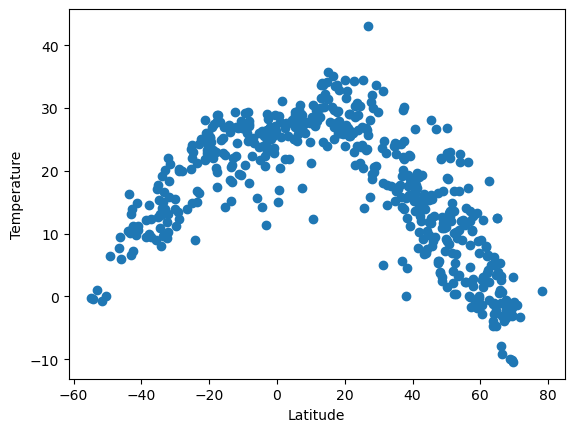

In [96]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

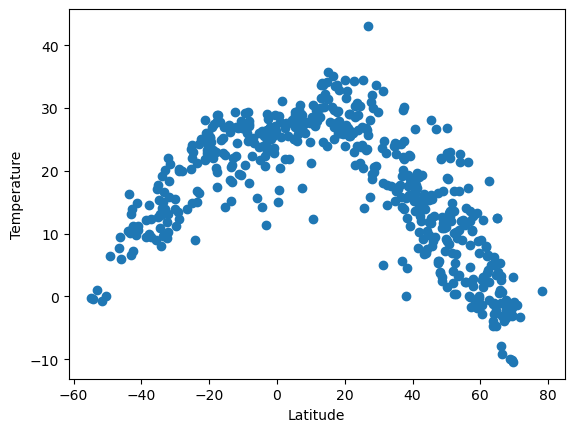

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

<Figure size 640x480 with 0 Axes>

In [102]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")
# Create a Scatter Plot for temperature vs latitude


#### Latitude Vs. Humidity

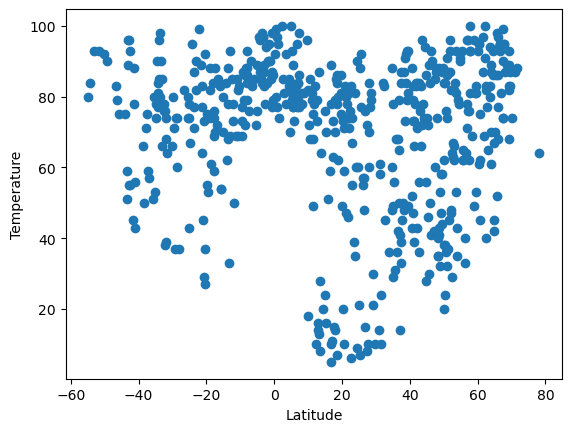

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

<Figure size 640x480 with 0 Axes>

In [104]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

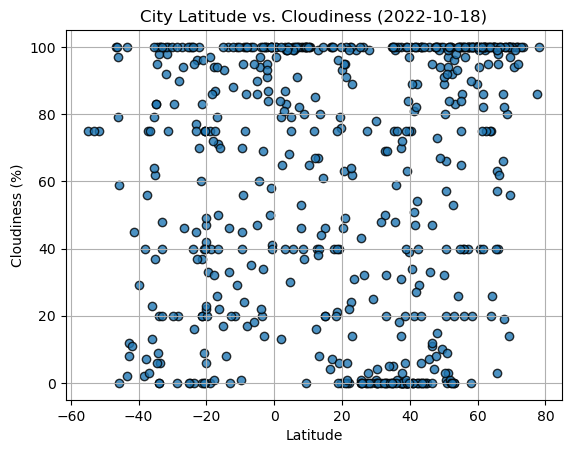

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

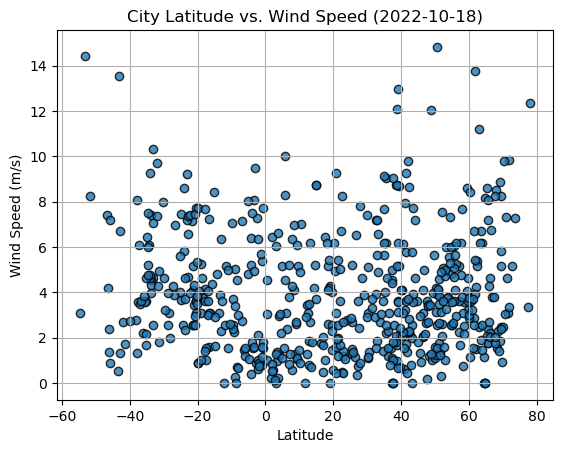

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


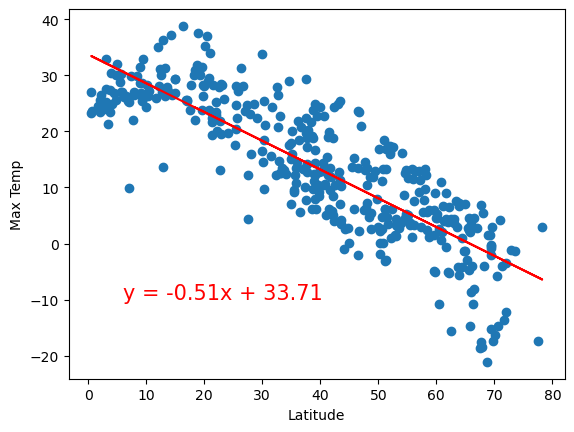

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


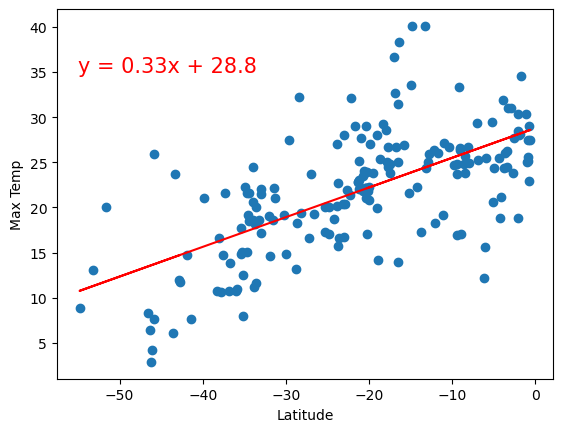

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


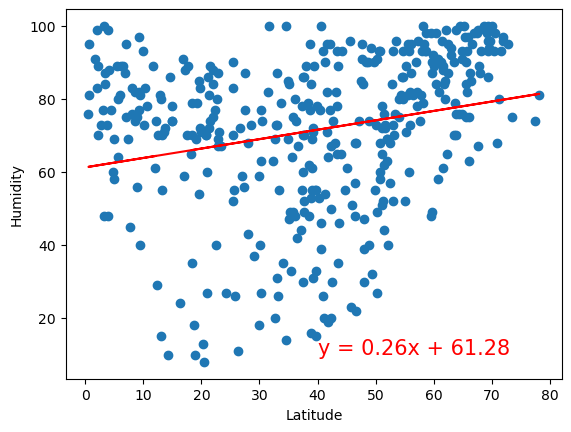

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


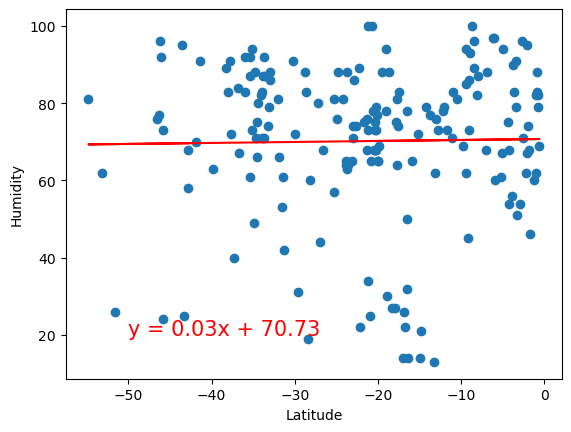

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


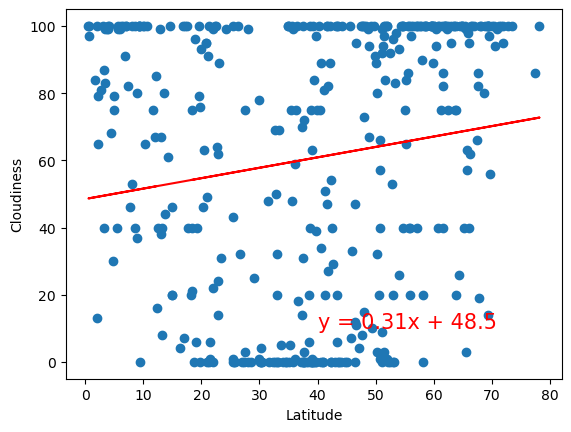

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


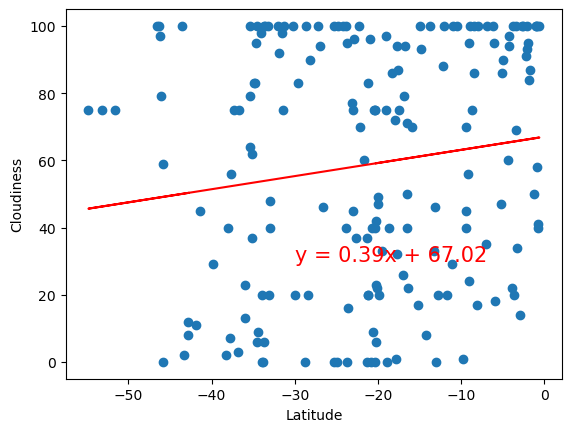

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


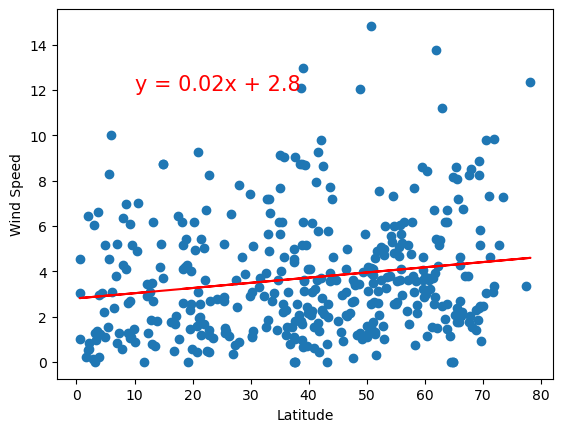

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


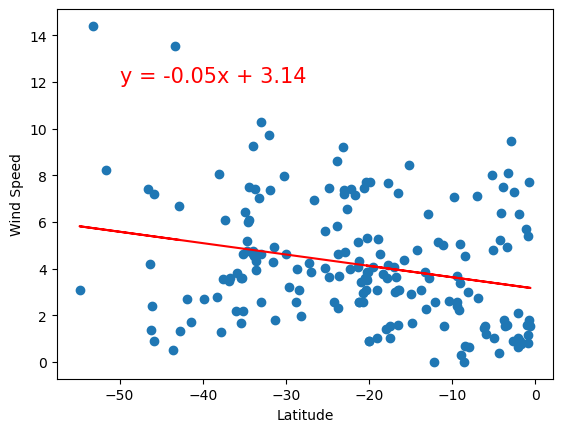

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE